In [3]:
from mytest.dataloader import *
val_ratio=0.05
seed=42  # 随机种子分割验证集和训练集

data_dir = "/home/fit/lulei/WORK/xjt/Protein_design/CyclicPeptide/Dataset/ALL_PDB"
cluster_file = os.path.join(data_dir,"tmp/cluster.tsv")
pdb_feature_dir = os.path.join(data_dir,"PDB_FEATURE")
pdb_dir =  os.path.join(data_dir,"final_cleaned_PDB")
link_file_path = os.path.join(data_dir,"LINK/results.txt")
cache_dir = os.path.join(data_dir,"dataset_cache")
crop_size = 168

In [4]:
dataset_train = get_or_create_dataset(
    cluster_file=cluster_file,
    pdb_feature_dir=pdb_feature_dir,
    pdb_dir=pdb_dir,
    link_file_path=link_file_path,
    crop_size=crop_size,
    cache_dir=cache_dir,
    split='train', 
    val_ratio=val_ratio,
    seed=seed
)

dataset_val = get_or_create_dataset(
    cluster_file=cluster_file,
    pdb_feature_dir=pdb_feature_dir,
    pdb_dir=pdb_dir,
    link_file_path=link_file_path,
    crop_size=crop_size,
    cache_dir=cache_dir,
    split='val', 
    val_ratio=val_ratio,
    seed=seed
)

Loading cached train dataset from /home/fit/lulei/WORK/xjt/Protein_design/CyclicPeptide/Dataset/ALL_PDB/dataset_cache/dataset_crop_size_168_val_ratio_0.05_seed_42_split_train.pkl
Loading cached val dataset from /home/fit/lulei/WORK/xjt/Protein_design/CyclicPeptide/Dataset/ALL_PDB/dataset_cache/dataset_crop_size_168_val_ratio_0.05_seed_42_split_val.pkl


In [12]:
length =[]
for data in dataset_train:
    for k, v in data.items():
        if k == "res_ids":
            length.append(len(v))




In [11]:
print(len(dataset_train.link_reader.data))
print(len(dataset_val.link_reader.data))

41535
41535


In [12]:
data = []            # will hold unique link dicts
seen_keys = set()    # track which keys we’ve already added
ww = 0

def collect_links(dataset):
    global ww
    for key, entry in dataset.link_reader.data.items():
        if key in dataset.link_reader.blacklist:
            ww += 1
            continue
        if key not in seen_keys:
            seen_keys.add(key)
            data.append(entry)

collect_links(dataset_train) #

print("Total number of unique links:", len(data))
print("Number of links in blacklist:", ww)
#统计LINK
#统计ssbond
#统计LINK
# 统计每个蛋白质的连接数量


Total number of unique links: 41322
Number of links in blacklist: 213


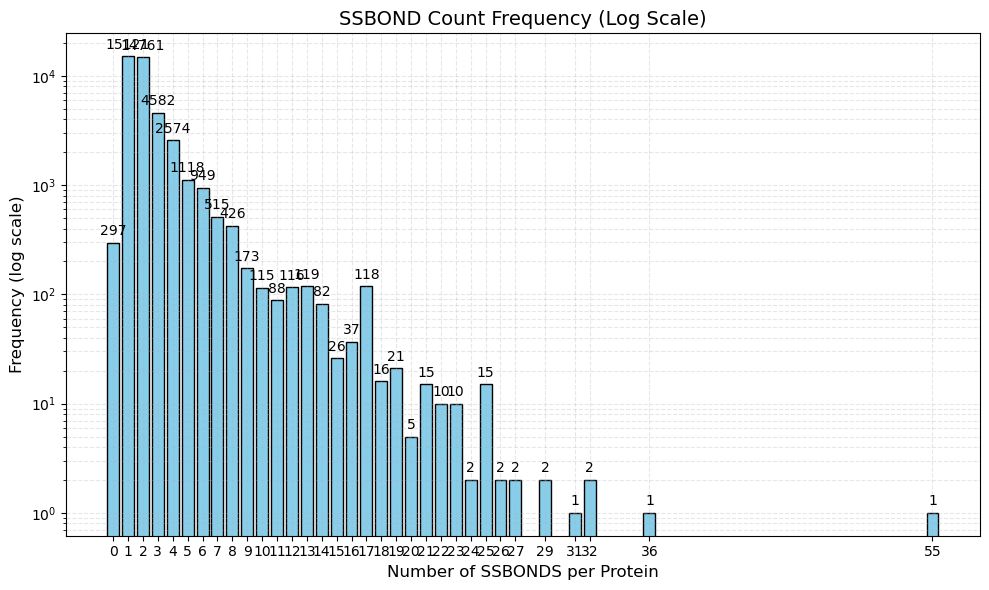

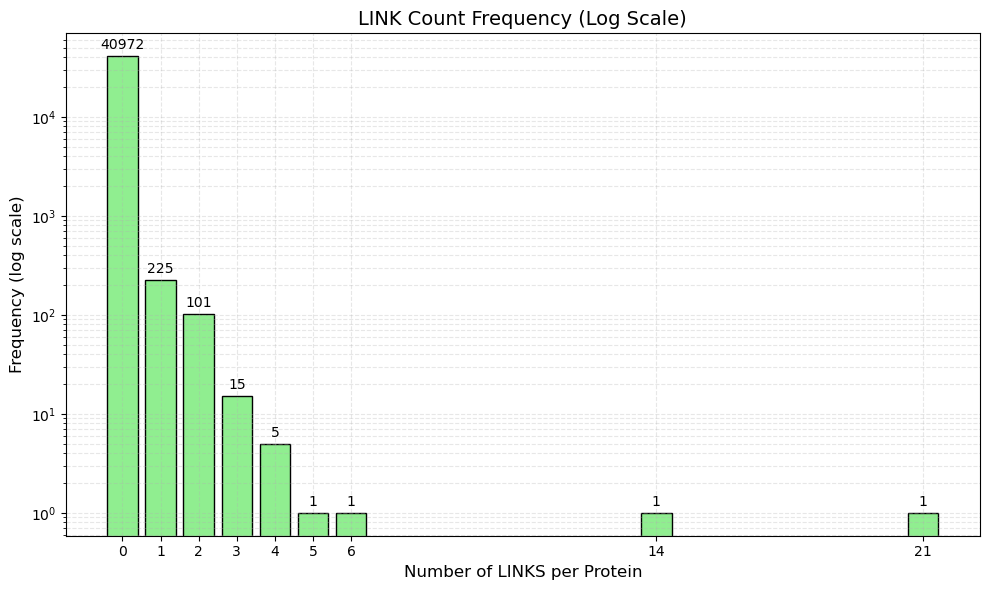

SSBOND统计结果:
蛋白质总数: 41322
SSBOND总数: 100057
平均SSBOND数/蛋白质: 2.42
最大SSBOND数/蛋白质: 55
最小SSBOND数/蛋白质: 0

SSBOND数量分布:
0个SSBOND的蛋白质数量: 297 (0.7%)
1个SSBOND的蛋白质数量: 15121 (36.6%)
2个SSBOND的蛋白质数量: 14761 (35.7%)
3个SSBOND的蛋白质数量: 4582 (11.1%)
4个SSBOND的蛋白质数量: 2574 (6.2%)
5个SSBOND的蛋白质数量: 1118 (2.7%)
6个SSBOND的蛋白质数量: 949 (2.3%)
7个SSBOND的蛋白质数量: 515 (1.2%)
8个SSBOND的蛋白质数量: 426 (1.0%)
9个SSBOND的蛋白质数量: 173 (0.4%)
10个SSBOND的蛋白质数量: 115 (0.3%)
11个SSBOND的蛋白质数量: 88 (0.2%)
12个SSBOND的蛋白质数量: 116 (0.3%)
13个SSBOND的蛋白质数量: 119 (0.3%)
14个SSBOND的蛋白质数量: 82 (0.2%)
15个SSBOND的蛋白质数量: 26 (0.1%)
16个SSBOND的蛋白质数量: 37 (0.1%)
17个SSBOND的蛋白质数量: 118 (0.3%)
18个SSBOND的蛋白质数量: 16 (0.0%)
19个SSBOND的蛋白质数量: 21 (0.1%)
20个SSBOND的蛋白质数量: 5 (0.0%)
21个SSBOND的蛋白质数量: 15 (0.0%)
22个SSBOND的蛋白质数量: 10 (0.0%)
23个SSBOND的蛋白质数量: 10 (0.0%)
24个SSBOND的蛋白质数量: 2 (0.0%)
25个SSBOND的蛋白质数量: 15 (0.0%)
26个SSBOND的蛋白质数量: 2 (0.0%)
27个SSBOND的蛋白质数量: 2 (0.0%)
29个SSBOND的蛋白质数量: 2 (0.0%)
31个SSBOND的蛋白质数量: 1 (0.0%)
32个SSBOND的蛋白质数量: 2 (0.0%)
36个SSBOND的蛋白质数量: 1 (0.0%)
55个SSBOND的蛋白质数量: 1 (

In [14]:
import matplotlib.pyplot as plt
from collections import defaultdict
# 1. 统计每个蛋白质的连接数量
ssbond_counts = [len(protein['ssbonds']) for protein in data]
link_counts = [len(protein['links']) for protein in data]

# 2. 计算频率分布
ssbond_freq = defaultdict(int)
for count in ssbond_counts:
    ssbond_freq[count] += 1

link_freq = defaultdict(int)
for count in link_counts:
    link_freq[count] += 1

# 3. 统计连接种类
# 统计SSBOND连接种类
ssbond_types = defaultdict(int)
for protein in data:
    for bond in protein['ssbonds']:
        # 创建标准化的键：氨基酸1-原子1:氨基酸2-原子2
        key1 = f"{bond['amino1']}-{bond['atom1']}:{bond['amino2']}-{bond['atom2']}"
        key2 = f"{bond['amino2']}-{bond['atom2']}:{bond['amino1']}-{bond['atom1']}"
        
        # 使用排序后的键确保对称连接被视为相同类型
        normalized_key = tuple(sorted([key1, key2]))
        ssbond_types[normalized_key] += 1

# 统计LINK连接种类
link_types = defaultdict(int)
for protein in data:
    for bond in protein['links']:
        key1 = f"{bond['amino1']}-{bond['atom1']}:{bond['amino2']}-{bond['atom2']}"
        key2 = f"{bond['amino2']}-{bond['atom2']}:{bond['amino1']}-{bond['atom1']}"
        normalized_key = tuple(sorted([key1, key2]))
        link_types[normalized_key] += 1

# 4. 绘制SSBOND频率分布图（对数尺度）
plt.figure(figsize=(10, 6))
ssbond_keys = sorted(ssbond_freq.keys())
ssbond_values = [ssbond_freq[k] for k in ssbond_keys]
bars = plt.bar(ssbond_keys, ssbond_values, color='skyblue', edgecolor='black')
plt.title('SSBOND Count Frequency (Log Scale)', fontsize=14)
plt.xlabel('Number of SSBONDS per Protein', fontsize=12)
plt.ylabel('Frequency (log scale)', fontsize=12)
plt.xticks(ssbond_keys)
plt.yscale('log')  # 设置y轴为对数尺度

# 添加数值标签
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., 
             height * 1.1, 
             str(int(height)),
             ha='center', 
             va='bottom',
             fontsize=10)

plt.grid(True, which='both', ls='--', alpha=0.3)
plt.tight_layout()
plt.show()

# 5. 绘制LINK频率分布图（对数尺度）
plt.figure(figsize=(10, 6))
link_keys = sorted(link_freq.keys())
link_values = [link_freq[k] for k in link_keys]
bars = plt.bar(link_keys, link_values, color='lightgreen', edgecolor='black')
plt.title('LINK Count Frequency (Log Scale)', fontsize=14)
plt.xlabel('Number of LINKS per Protein', fontsize=12)
plt.ylabel('Frequency (log scale)', fontsize=12)
plt.xticks(link_keys)
plt.yscale('log')  # 设置y轴为对数尺度

# 添加数值标签
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., 
             height * 1.1, 
             str(int(height)),
             ha='center', 
             va='bottom',
             fontsize=10)

plt.grid(True, which='both', ls='--', alpha=0.3)
plt.tight_layout()
plt.show()

# 6. 打印统计结果
print("="*50)
print("SSBOND统计结果:")
print("="*50)
print(f"蛋白质总数: {len(data)}")
print(f"SSBOND总数: {sum(ssbond_counts)}")
print(f"平均SSBOND数/蛋白质: {sum(ssbond_counts)/len(data):.2f}")
print(f"最大SSBOND数/蛋白质: {max(ssbond_counts)}")
print(f"最小SSBOND数/蛋白质: {min(ssbond_counts)}")

print("\nSSBOND数量分布:")
for count, freq in sorted(ssbond_freq.items()):
    print(f"{count}个SSBOND的蛋白质数量: {freq} ({freq/len(data)*100:.1f}%)")

print("\nSSBOND连接种类:")
for i, (bond_type, count) in enumerate(ssbond_types.items(), 1):
    # 从标准化键中提取连接信息
    parts = [s.split('-') for s in bond_type[0].split(':')]
    amino1, atom1 = parts[0]
    amino2, atom2 = parts[1]
    print(f"类型 {i}: {amino1}-{atom1} ↔ {amino2}-{atom2} (出现次数: {count})")

print("\n" + "="*50)
print("LINK统计结果:")
print("="*50)
print(f"LINK总数: {sum(link_counts)}")
print(f"平均LINK数/蛋白质: {sum(link_counts)/len(data):.2f}")
print(f"最大LINK数/蛋白质: {max(link_counts)}")
print(f"最小LINK数/蛋白质: {min(link_counts)}")

print("\nLINK数量分布:")
for count, freq in sorted(link_freq.items()):
    print(f"{count}个LINK的蛋白质数量: {freq} ({freq/len(data)*100:.1f}%)")

if link_types:
    print("\nLINK连接种类:")
    for i, (bond_type, count) in enumerate(link_types.items(), 1):
        parts = [s.split('-') for s in bond_type[0].split(':')]
        amino1, atom1 = parts[0]
        amino2, atom2 = parts[1]
        print(f"类型 {i}: {amino1}-{atom1} ↔ {amino2}-{atom2} (出现次数: {count})")
else:
    print("\n未发现任何LINK连接")

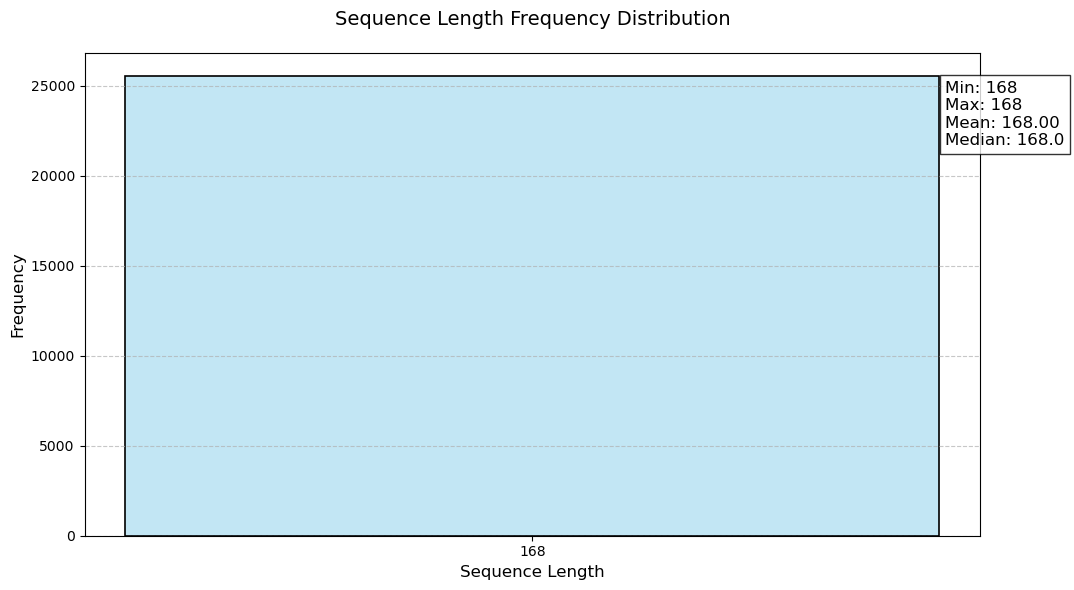

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 示例数据（替换为你的实际数据）
lengths = length

# 计算统计信息
min_val = min(lengths)
max_val = max(lengths)
mean_val = np.mean(lengths)
median_val = np.median(lengths)

# 创建画布
plt.figure(figsize=(10, 6))

# 使用seaborn绘制直方图（带密度曲线）
ax = sns.histplot(
    lengths, 
    bins=np.arange(min_val, max_val + 2) - 0.5,  # 对齐整数中心
    kde=True,                                   # 添加密度曲线
    stat='count',                               # 显示频数
    color='skyblue',
    edgecolor='black',
    linewidth=1.2
)

# 添加统计信息文本
stats_text = f"Min: {min_val}\nMax: {max_val}\nMean: {mean_val:.2f}\nMedian: {median_val}"
plt.gcf().text(0.95, 0.75, stats_text, fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

# 添加标题和标签
plt.title('Sequence Length Frequency Distribution', fontsize=14, pad=20)
plt.xlabel('Sequence Length', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 调整X轴为整数刻度
plt.xticks(np.arange(min_val, max_val + 1))

# 优化布局
plt.tight_layout()
plt.show()